<a href="https://colab.research.google.com/github/rsrikrishnan27/DS/blob/main/Stellar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project aims at classifying the celestial objects into star, quasar or galaxy using the optical filters and the object’s redshift. The dataset, available at Kaggle, is originally taken from SDSS (Sloan Digital Sky Survey).

## Loading Required packages

In [ ]:
pip install 'eli5'

     |████████████████████████████████| 106 kB 7.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from keras.utils.vis_utils import plot_model
from sklearn.neural_network import MLPClassifier
from itertools import cycle
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

## Data importing & cleaning 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing data
st_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/star_classification.csv')
st_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Checking for NULL
st_df.isnull().values.any()

False

In [ ]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
st_df = st_df[['u', 'g', 'r', 'i', 'z','class','redshift']]
st_df.describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [ ]:
# Identifying outlier
noise = st_df.query('u < 0 or g < 0 or r < 0 or i < 0 or z < 0')
noise

,u,g,r,i,z,class,redshift
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,STAR,0.000089


In [ ]:
# Removing outlier
st_df = st_df.drop(79543)

## EDA

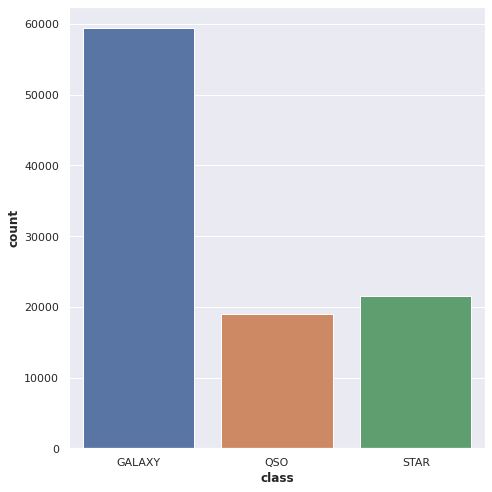

In [ ]:
# Distribution of Target Variable
sns.set(rc = {'figure.figsize':(7,7)})
ax = sns.countplot(x="class", data=st_df)
plt.show()

In [ ]:
# Correlation plot of features
st_df.corr().style.background_gradient()

,u,g,r,i,z,redshift
u,1.000000,0.853350,0.728681,0.618346,0.545760,0.166816
g,0.853350,1.000000,0.932996,0.847046,0.775302,0.318910
r,0.728681,0.932996,1.000000,0.962868,0.919114,0.433237
i,0.618346,0.847046,0.962868,1.000000,0.971546,0.492381
z,0.545760,0.775302,0.919114,0.971546,1.000000,0.501060
redshift,0.166816,0.318910,0.433237,0.492381,0.501060,1.000000


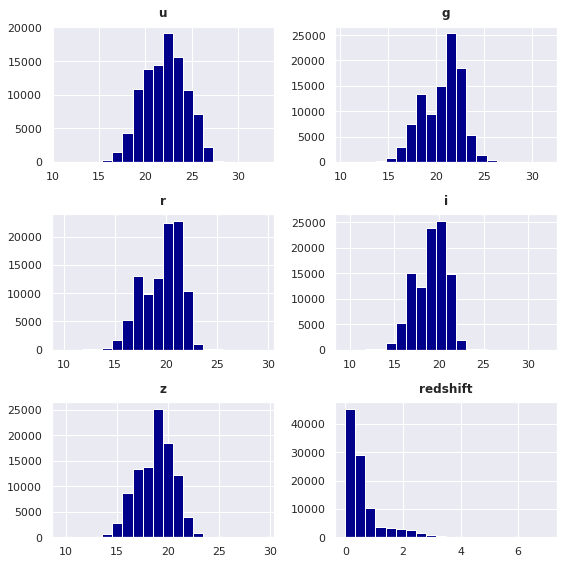

In [ ]:
# Distribution of Features
a = st_df.hist(figsize = (8,8), bins = 20,color = "darkblue")
plt.show()

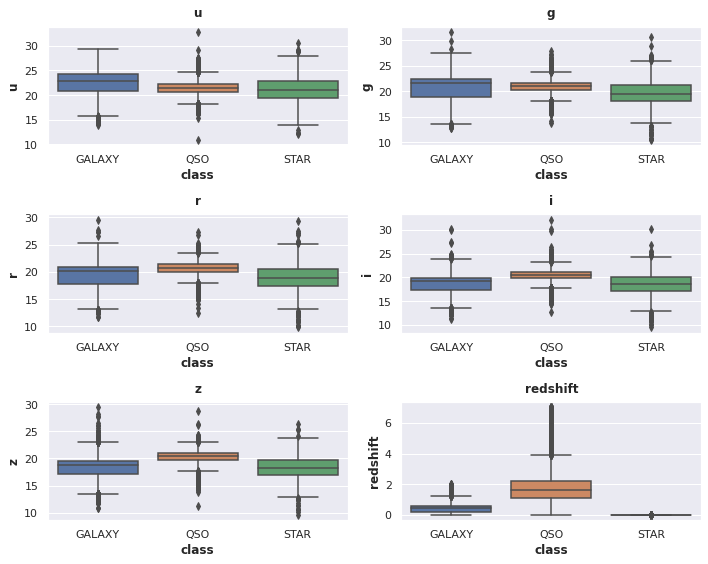

In [ ]:
# Distribution of Features w.r.t class

sns.set(rc = {'figure.figsize':(10,8)})
figure, axis = plt.subplots(3, 2)

feat_list = ['u', 'g', 'r', 'i', 'z','redshift']

sns.boxplot(y=feat_list[0],x='class',data=st_df, ax = axis[0, 0]).set_title(feat_list[0])
sns.boxplot(y=feat_list[1],x='class',data=st_df, ax = axis[0, 1]).set_title(feat_list[1])
sns.boxplot(y=feat_list[2],x='class',data=st_df, ax = axis[1, 0]).set_title(feat_list[2])
sns.boxplot(y=feat_list[3],x='class',data=st_df, ax = axis[1, 1]).set_title(feat_list[3])
sns.boxplot(y=feat_list[4],x='class',data=st_df, ax = axis[2, 0]).set_title(feat_list[4])
sns.boxplot(y=feat_list[5],x='class',data=st_df, ax = axis[2, 1]).set_title(feat_list[5])

 
# Combine all the operations and display
plt.show()

## Splitting Data into Train, Validation and test

In [ ]:
x = st_df.drop(['class'],axis = 1)
y = st_df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.125, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_test.shape

(20000, 6)

## Training models on Train dataset and validating accuracy on Validation Set

### Decision Tree

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_val = dtree_model.predict(X_val)
dtree_model_score = dtree_model.score(X_val,y_val)

In [ ]:
print(dtree_model_score)

0.9447


In [ ]:
cm_dtree = confusion_matrix(y_val, dtree_val)

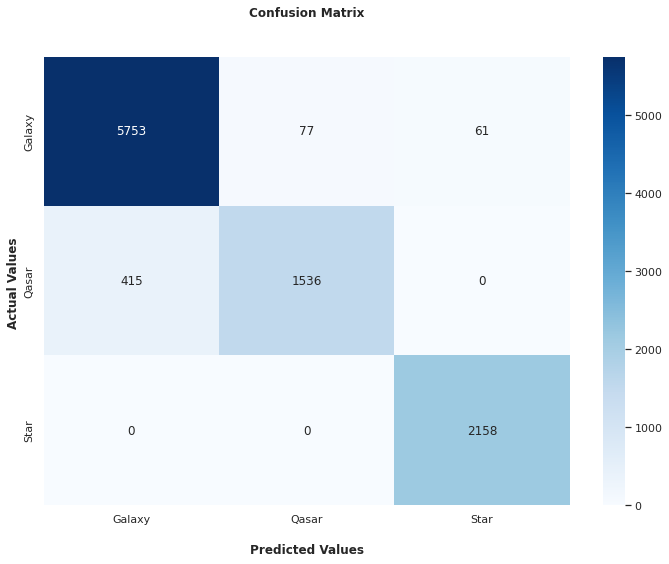

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm_dtree, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(['Galaxy','Qasar','Star'])
ax.yaxis.set_ticklabels(['Galaxy','Qasar','Star'])
plt.show()

In [ ]:
target_names = ['Galaxy','Qasar','Star']
print(classification_report(y_val, dtree_val, target_names=target_names))

              precision    recall  f1-score   support

      Galaxy       0.93      0.98      0.95      5891
       Qasar       0.95      0.79      0.86      1951
        Star       0.97      1.00      0.99      2158

    accuracy                           0.94     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.95      0.94      0.94     10000



### Logistic Regression

In [ ]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
intercpet = lm.intercept_


In [ ]:
print(intercpet)

[  0.59633983  -2.64446243 -31.14678938]


In [ ]:
coeff = lm.coef_

In [ ]:
print(coeff)

[[ -0.13005054   3.72824324  -1.3585227   -1.71636258  -0.27430765
   -0.27837814]
 [ -1.13351888  -1.79784241  -0.5186002    1.72163707   0.39467224
    4.39652895]
 [  0.8269809   -0.37857256  -0.3090915    0.16479724   0.38481964
  -42.71567242]]


In [ ]:
logit_val = lm.predict(X_val)
logit_score = lm.score(X_val,y_val)

In [ ]:
print(logit_score)

0.939


In [ ]:
cm_logit = confusion_matrix(y_val, logit_val)

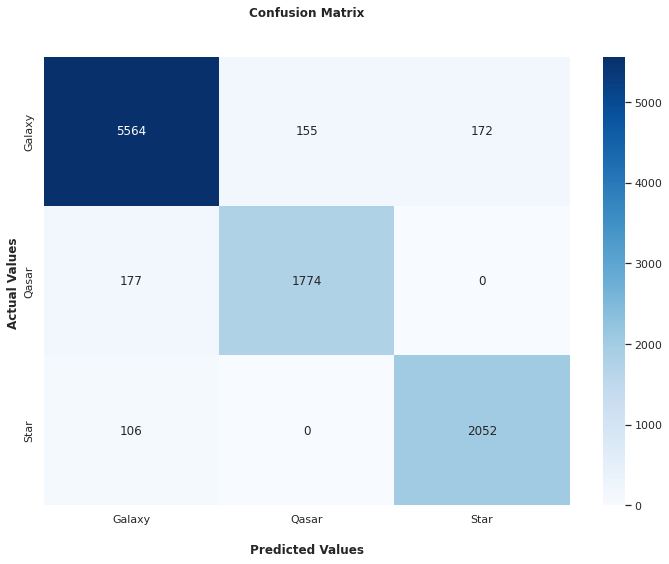

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm_logit, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(['Galaxy','Qasar','Star'])
ax.yaxis.set_ticklabels(['Galaxy','Qasar','Star'])
plt.show()

In [ ]:
target_names = ['Galaxy','Qasar','Star']
print(classification_report(y_val, logit_val, target_names=target_names))

              precision    recall  f1-score   support

      Galaxy       0.95      0.94      0.95      5891
       Qasar       0.92      0.91      0.91      1951
        Star       0.92      0.95      0.94      2158

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



### Neural Network

In [ ]:
# Create a classifier
clf = MLPClassifier(hidden_layer_sizes=(8, 3), learning_rate_init=0.01) # Fit the classifier using the training set
clf.fit(X_train, y_train) # Evaluate the classifier using the test set

MLPClassifier(hidden_layer_sizes=(8, 3), learning_rate_init=0.01)

In [ ]:
nn_val = clf.predict(X_val)
nn_score = clf.score(X_val,y_val)
print(nn_score)

0.9662


In [ ]:
nn_cm = confusion_matrix(y_val,nn_val)

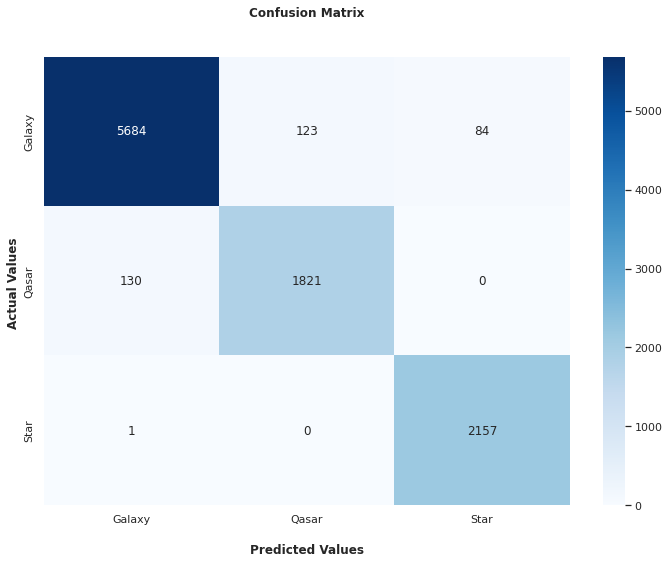

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(nn_cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(['Galaxy','Qasar','Star'])
ax.yaxis.set_ticklabels(['Galaxy','Qasar','Star'])
plt.show()

In [ ]:
target_names = ['Galaxy','Qasar','Star']
print(classification_report(y_val,nn_val,target_names=target_names))

              precision    recall  f1-score   support

      Galaxy       0.98      0.96      0.97      5891
       Qasar       0.94      0.93      0.94      1951
        Star       0.96      1.00      0.98      2158

    accuracy                           0.97     10000
   macro avg       0.96      0.97      0.96     10000
weighted avg       0.97      0.97      0.97     10000



## Applying NN Model test Dataset

In [ ]:
nn_test = clf.predict(X_test)

In [ ]:
nn_cm_test = confusion_matrix(y_test,nn_test)

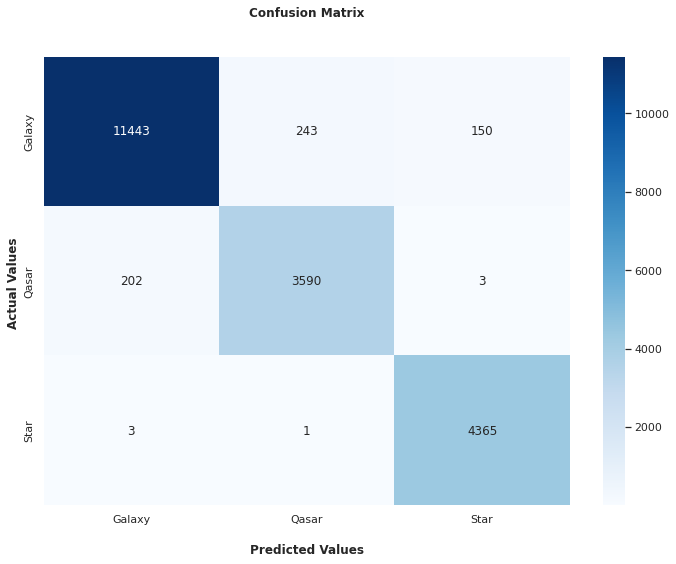

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(nn_cm_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## labels 
ax.xaxis.set_ticklabels(['Galaxy','Qasar','Star'])
ax.yaxis.set_ticklabels(['Galaxy','Qasar','Star'])
plt.show()

In [ ]:
target_names = ['Galaxy','Qasar','Star']
print(classification_report(y_test,nn_test,target_names=target_names))

              precision    recall  f1-score   support

      Galaxy       0.98      0.97      0.97     11836
       Qasar       0.94      0.95      0.94      3795
        Star       0.97      1.00      0.98      4369

    accuracy                           0.97     20000
   macro avg       0.96      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



From the model results, we can infer that NN model gives the best results

## Identifying Important Features

In [ ]:
def get_feature_importance(j, n):
  s = accuracy_score(y_test, nn_test) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

In [ ]:
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)# Plot

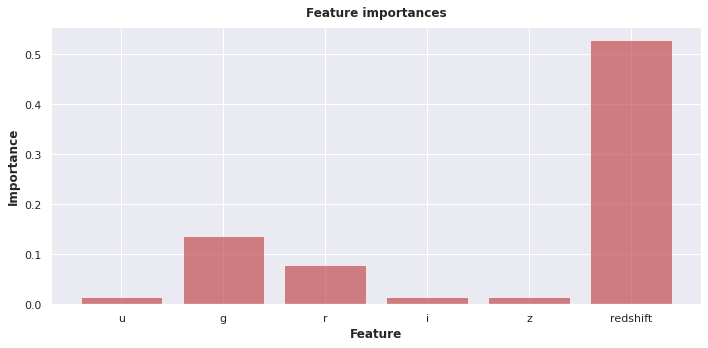

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(list(x.columns), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()